## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
# In this module some functions are written which helps in doing EDA
import eda_helper_functions

In [3]:
from sklearn.ensemble import IsolationForest

## 2. Read the Training Data

In [94]:
file_path = r"C:\Users\Shivay\Desktop\flights-sagemaker-project\data\train.csv"
train = pd.read_csv(file_path)
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-05-21,Delhi,Cochin,14:05:00,17:55:00,230,0.0,No Info,6094
1,Indigo,2019-03-27,Delhi,Cochin,10:45:00,21:00:00,615,1.0,No Info,6838
2,Jet Airways,2019-05-12,Banglore,Delhi,19:50:00,22:50:00,180,0.0,No Info,7229
3,Jet Airways,2019-06-06,Kolkata,Banglore,20:25:00,14:25:00,1080,1.0,No Info,12692
4,Multiple Carriers,2019-05-15,Delhi,Cochin,11:40:00,19:15:00,455,1.0,No Info,9001


### Checking datatype

In [5]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          1600 non-null   object 
 1   date_of_journey  1600 non-null   object 
 2   source           1600 non-null   object 
 3   destination      1600 non-null   object 
 4   dep_time         1600 non-null   object 
 5   arrival_time     1600 non-null   object 
 6   duration         1600 non-null   int64  
 7   total_stops      1600 non-null   float64
 8   additional_info  1600 non-null   object 
 9   price            1600 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 125.1+ KB


- total_stops has float value since some values are missing
- date_of_journey,dep_time,arrival_time are in str format this should be converted in datetime

### Fixing datatype

In [7]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

### Observation about numeric variable

In [8]:
train.describe(include = 'number')

,duration,total_stops,price
count,1600.000000,1600.000000,1600.00000
mean,629.356250,0.806250,9105.50500
std,496.315938,0.659722,4496.37128
min,75.000000,0.000000,1759.00000
25%,173.750000,0.000000,5192.00000
50%,505.000000,1.000000,8358.00000
75%,920.000000,1.000000,12692.00000
max,2565.000000,3.000000,31825.00000


- if we consider total_stops as categorical variable
- we can change it as below

In [20]:
(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="object")
)

,airline,source,destination,total_stops,additional_info
count,1600,1600,1600,1600.0,1600
unique,8,5,6,4.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,583,669,669,868.0,1271


### Observation about categorical variable

In [10]:
train.describe(include="object") # include="o" doesn't work in my case

,airline,source,destination,additional_info
count,1600,1600,1600,1600
unique,8,5,6,5
top,Jet Airways,Delhi,Cochin,No Info
freq,583,669,669,1271


## 4. High-level analysis of Missing Values

### Missing value

In [11]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


#### Plot for missing value info using "plot_missing_info" funcion of "eda_helper_functions" module.

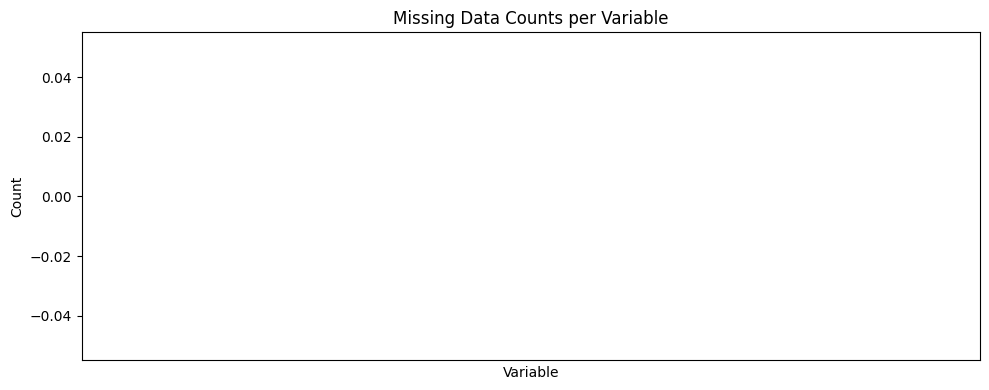

In [12]:
eda_helper_functions.plot_missing_info(train)

### "missingno" library can be used for the best visualisation

In [27]:
# pip install missingno
import missingno as mino

### 1. Matrix

<Axes: >

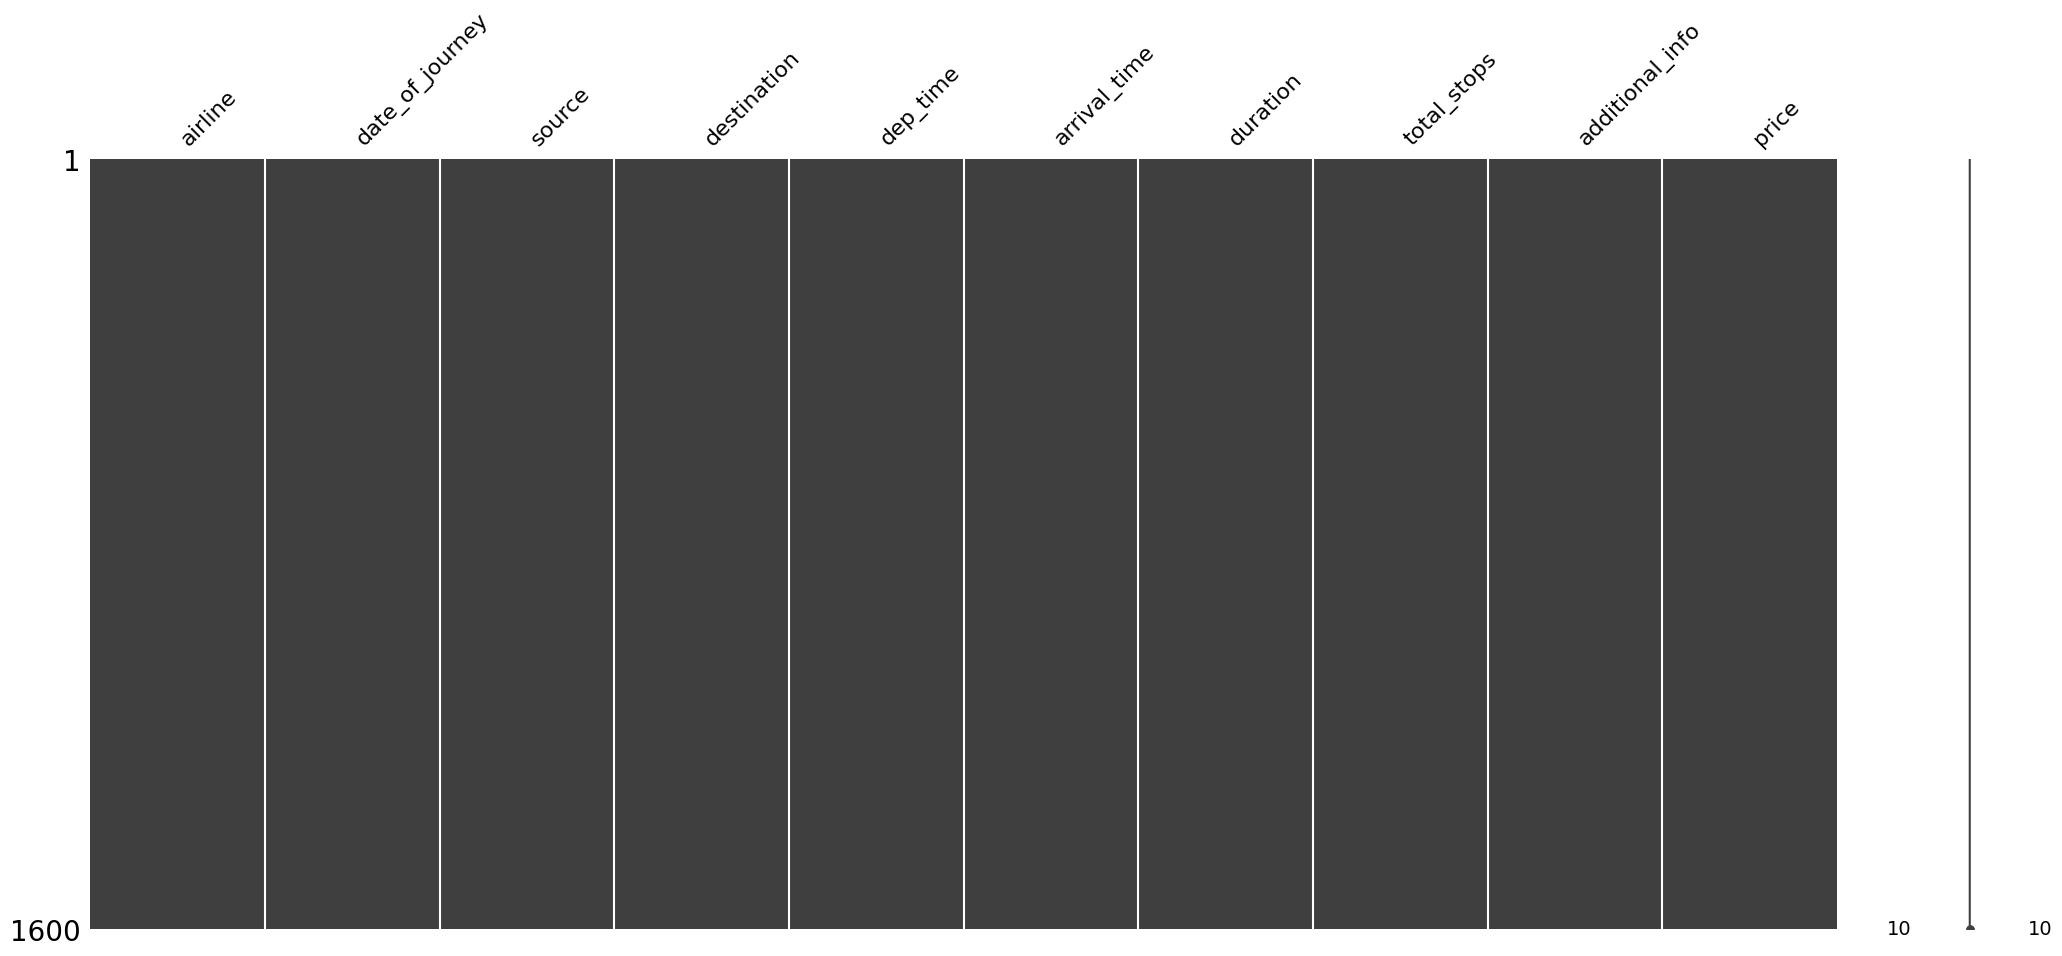

In [28]:
mino.matrix(train)

### 2. Bar

<Axes: >

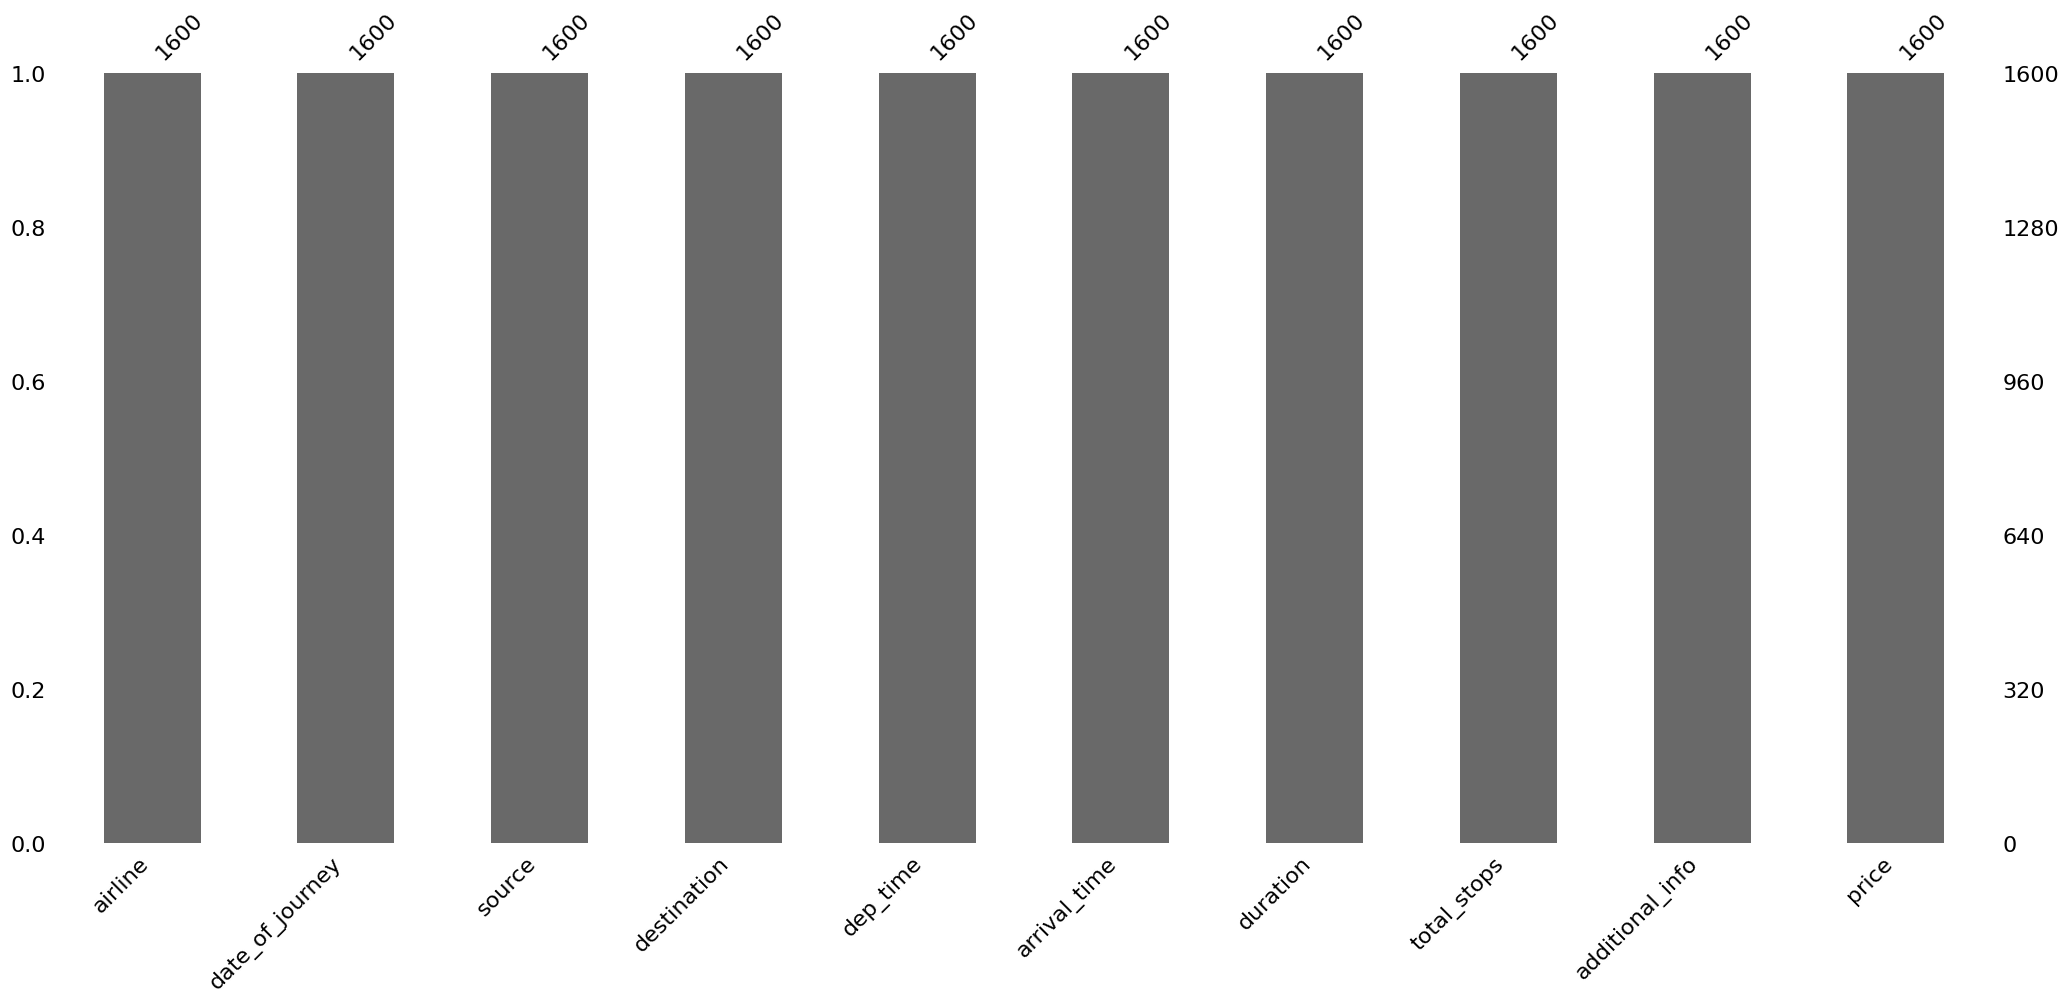

In [29]:
mino.bar(train)

### 3. Heatmap

<Axes: >

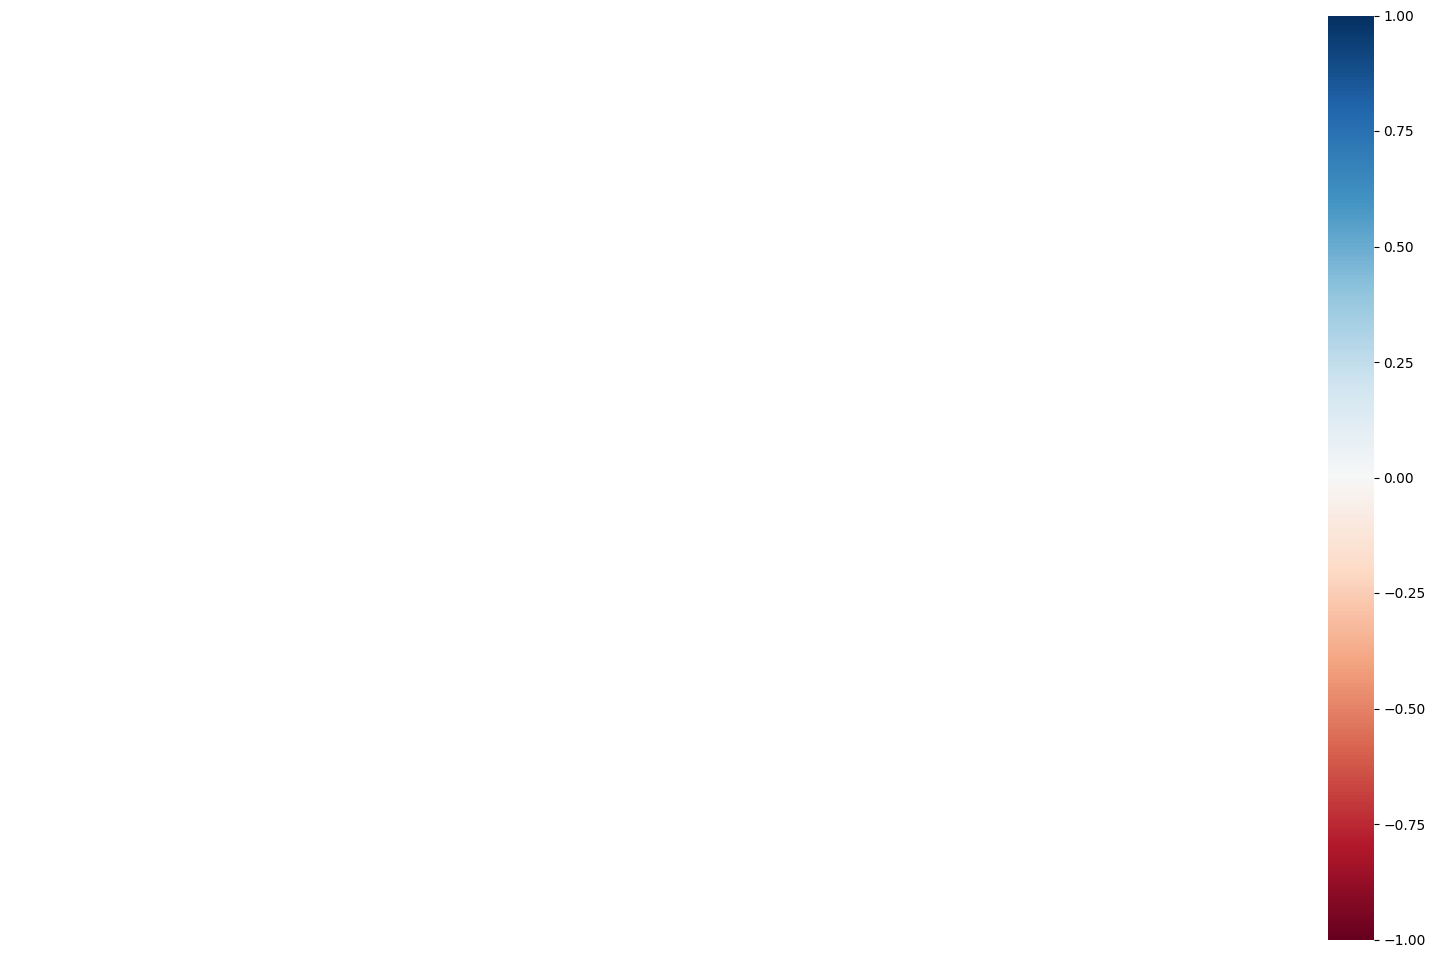

In [30]:
mino.heatmap(train)

### 4. Dendrogram

<Axes: >

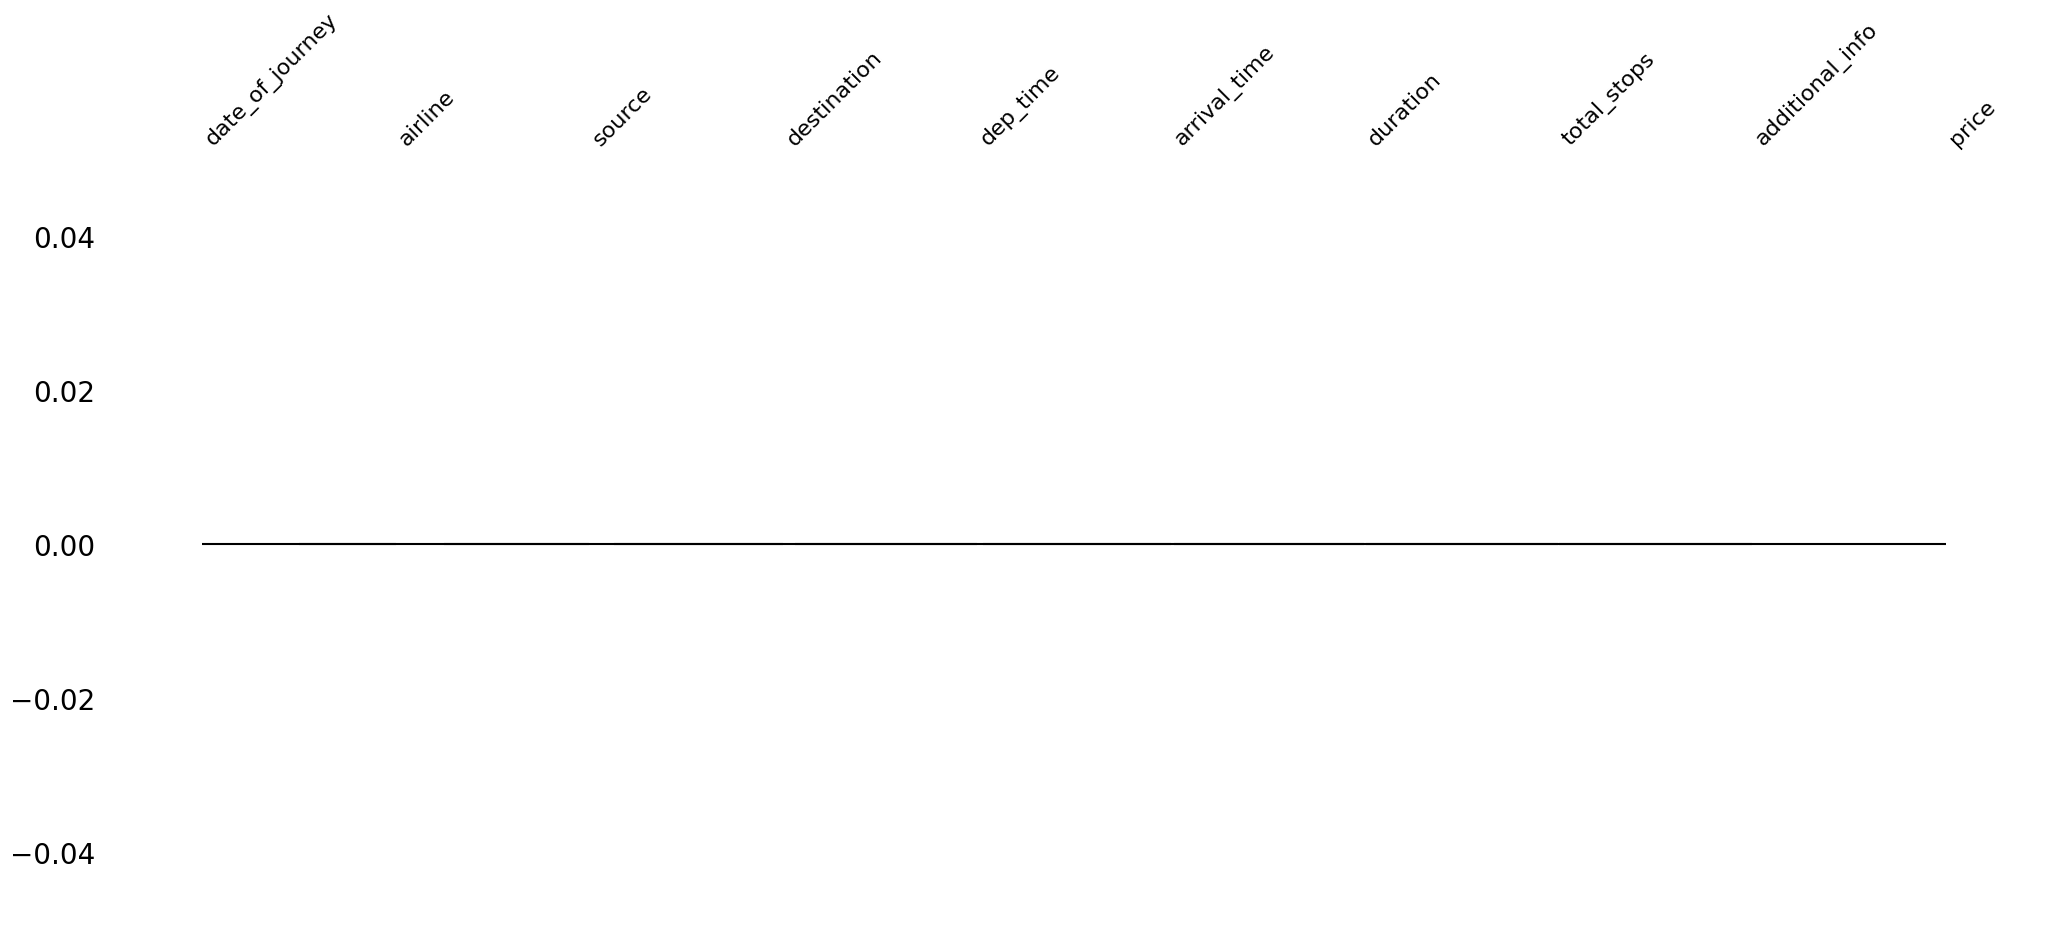

In [31]:
mino.dendrogram(train)

#### Observation :
- In this data there is no misssing value

## 5. High-level analysis of Outliers

In [13]:
# imported IsolationForest 
# from sklearn.ensemble import IsolationForest

#### Using IsolationForest function

- this function is based on ensemble algorithm
- it works on numeric features only
- it randomly picks any feature and from this randomly chosen feature picks any value
- on that chosen value we apply outlier condition if value should be left or right of decision tree

In [14]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [99]:
(
	train
	.assign(outlier=forest.fit_predict(train
                                       .drop(columns="price")
                                       .select_dtypes(include="number")))
    # .query("outlier == -1")
    # .duration
    # .describe()

)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Air India,2019-05-21,Delhi,Cochin,14:05:00,17:55:00,230,0.0,No Info,6094,-1
1,Indigo,2019-03-27,Delhi,Cochin,10:45:00,21:00:00,615,1.0,No Info,6838,1
2,Jet Airways,2019-05-12,Banglore,Delhi,19:50:00,22:50:00,180,0.0,No Info,7229,1
3,Jet Airways,2019-06-06,Kolkata,Banglore,20:25:00,14:25:00,1080,1.0,No Info,12692,1
4,Multiple Carriers,2019-05-15,Delhi,Cochin,11:40:00,19:15:00,455,1.0,No Info,9001,1
...,...,...,...,...,...,...,...,...,...,...,...
1595,Jet Airways,2019-05-03,Banglore,Delhi,06:00:00,08:45:00,165,0.0,No Info,7229,1
1596,Jet Airways,2019-05-06,Kolkata,Banglore,09:35:00,23:35:00,840,1.0,No Info,12121,1
1597,Indigo,2019-03-03,Delhi,Cochin,18:35:00,01:35:00,420,1.0,No Info,14871,1
1598,Multiple Carriers,2019-03-21,Delhi,Cochin,10:00:00,19:15:00,555,1.0,In-flight meal not included,8401,1


In [100]:
(
	train
	.assign(outlier=forest.fit_predict(train
                                       .drop(columns="price")
                                       .select_dtypes(include="number")))
    .query("outlier == -1")
    .duration
    .describe()

)

count     713.000000
mean      785.820477
std       636.122708
min        75.000000
25%       150.000000
50%       610.000000
75%      1400.000000
max      2565.000000
Name: duration, dtype: float64

## 6. Pair Plots

- to find relationship among numerical variables
- This is a pairwise scatterplot for numeric varables

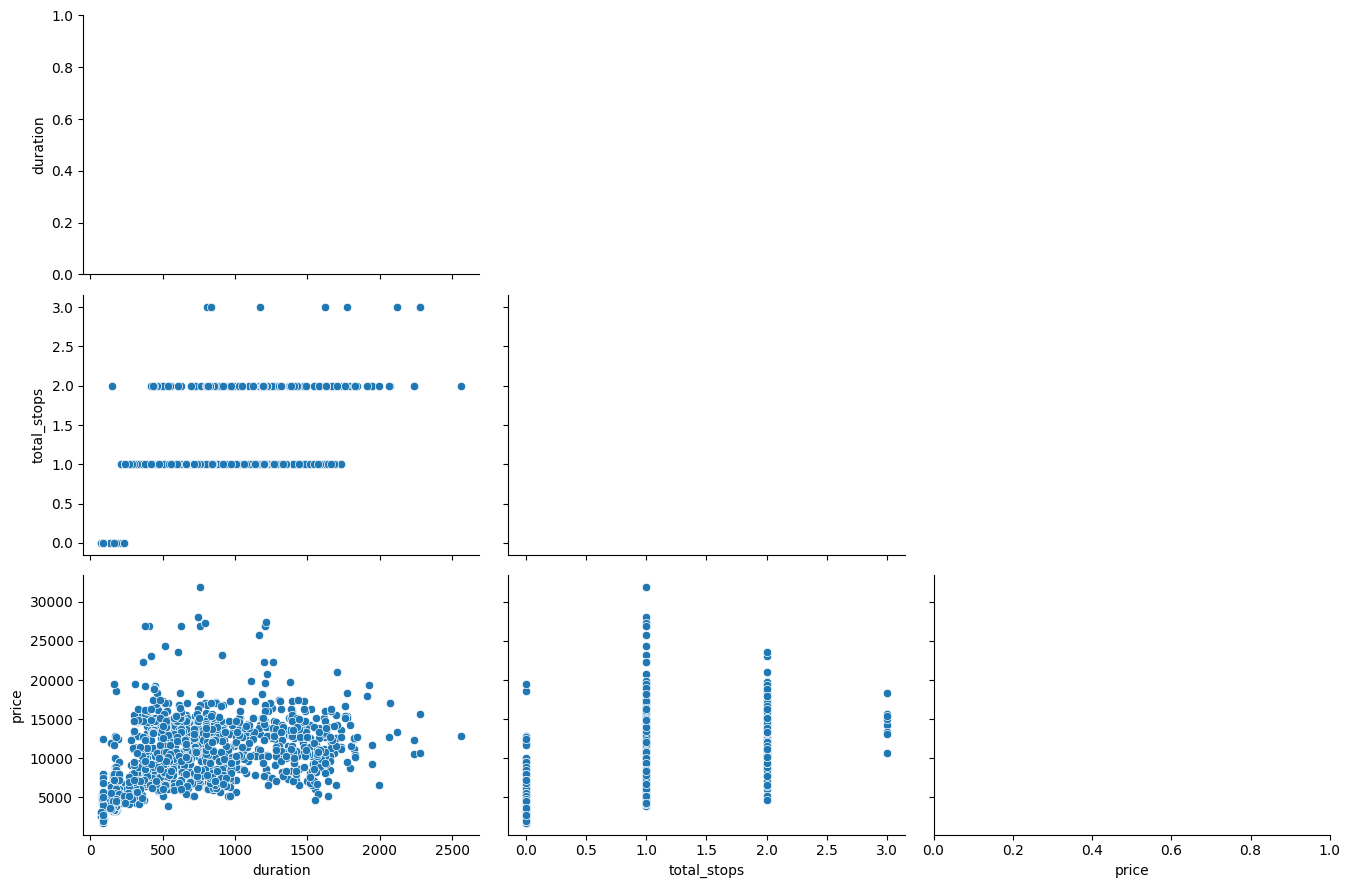

In [91]:
eda_helper_functions.pair_plots(train)

- price and duration have linear relation
- for 1 stop price is from 5000 to 35000
- for 2 stop price is from 7000 to 23000
- so we can say stops and price are related

## 7. Correlation Analysis

### Analysis of numerical variables

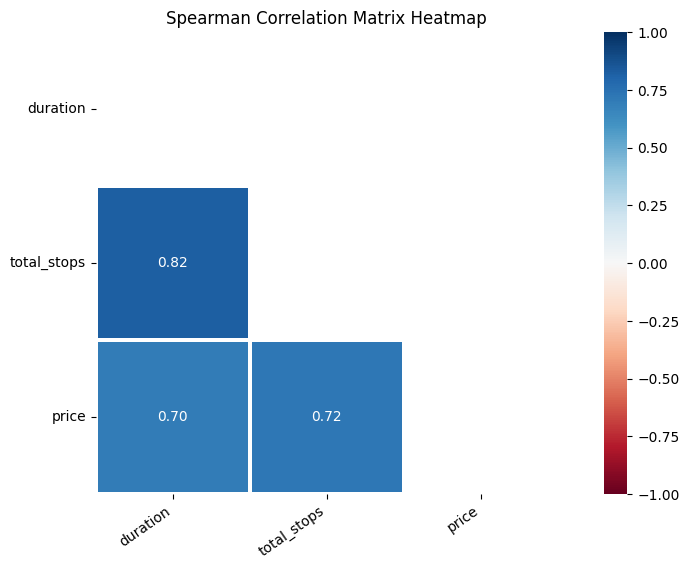

In [17]:
eda_helper_functions.correlation_heatmap(train)

In [18]:
# for understanding what is happening in "eda_helper_functions"
train.corr(method = 'spearman',numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.822070,0.698231
total_stops,0.822070,1.000000,0.721637
price,0.698231,0.721637,1.000000


### Analysis of categorical variables

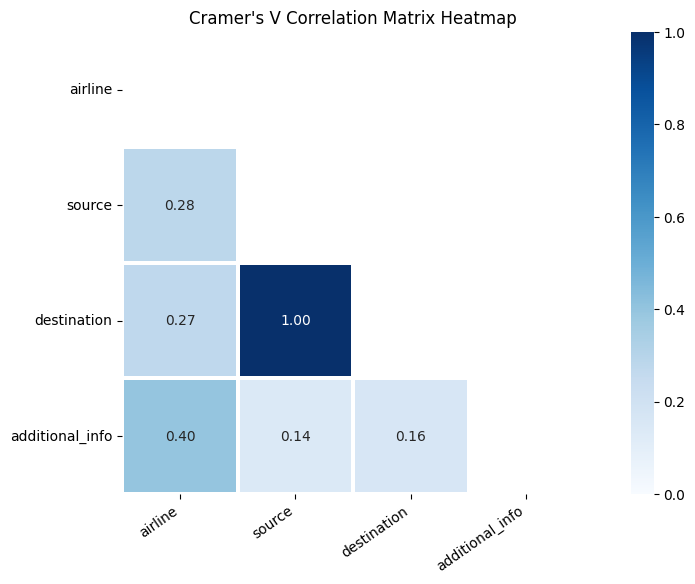

In [19]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed Analysis of each feature

In [21]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 airline

In [22]:
train.airline

0               Air India
1                  Indigo
2             Jet Airways
3             Jet Airways
4       Multiple Carriers
              ...        
1595          Jet Airways
1596          Jet Airways
1597               Indigo
1598    Multiple Carriers
1599             Spicejet
Name: airline, Length: 1600, dtype: object

#### Step 1:

In [23]:
eda_helper_functions.cat_summary(train, "airline")

0               Air India
1                  Indigo
2             Jet Airways
3             Jet Airways
4       Multiple Carriers
              ...        
1595          Jet Airways
1596          Jet Airways
1597               Indigo
1598    Multiple Carriers
1599             Spicejet
Name: airline, Length: 1600, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 1,600 / 1,600 rows


,
count,1600
unique,8
top,Jet Airways
freq,583


,count,percentage
category,,
Jet Airways,583,0.364375
Indigo,328,0.205000
Air India,238,0.148750
Multiple Carriers,195,0.121875
Spicejet,130,0.081250
Vistara,62,0.038750
Air Asia,39,0.024375
Goair,25,0.015625


#### Step 2:

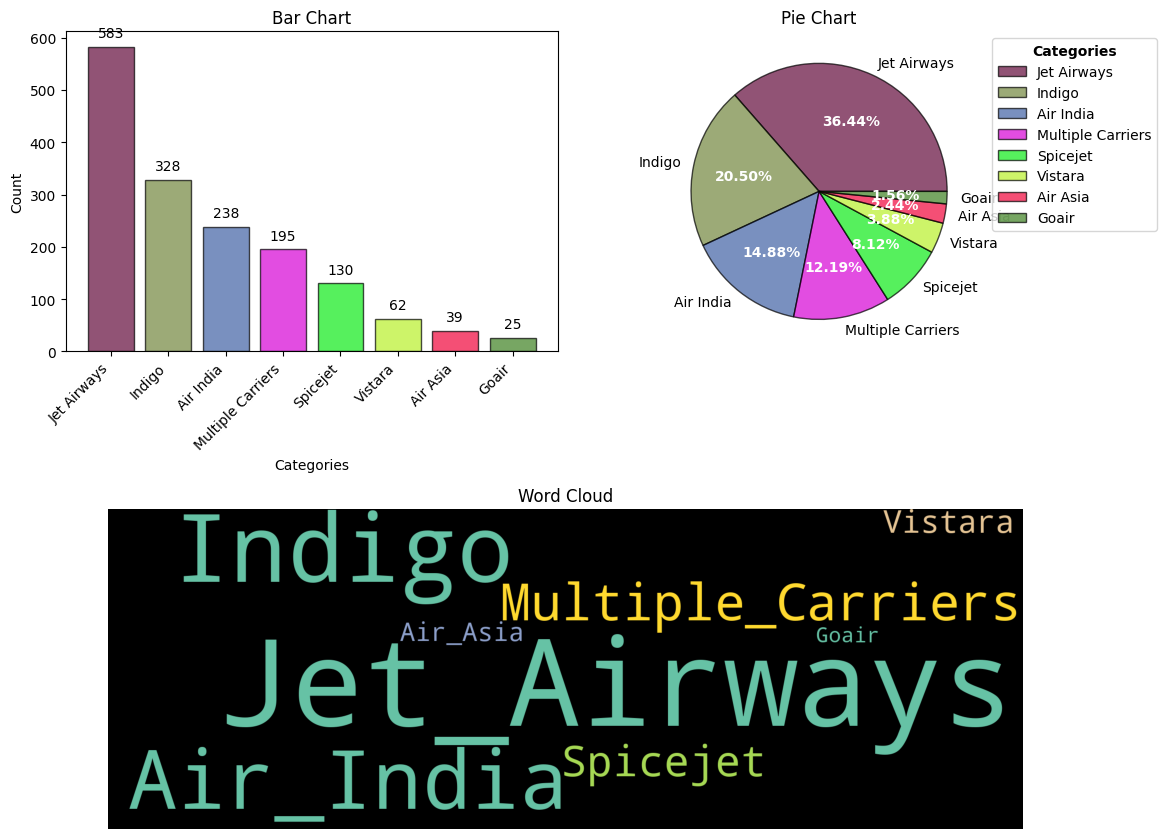

In [24]:
eda_helper_functions.cat_univar_plots(train, "airline")

#### Step 3:

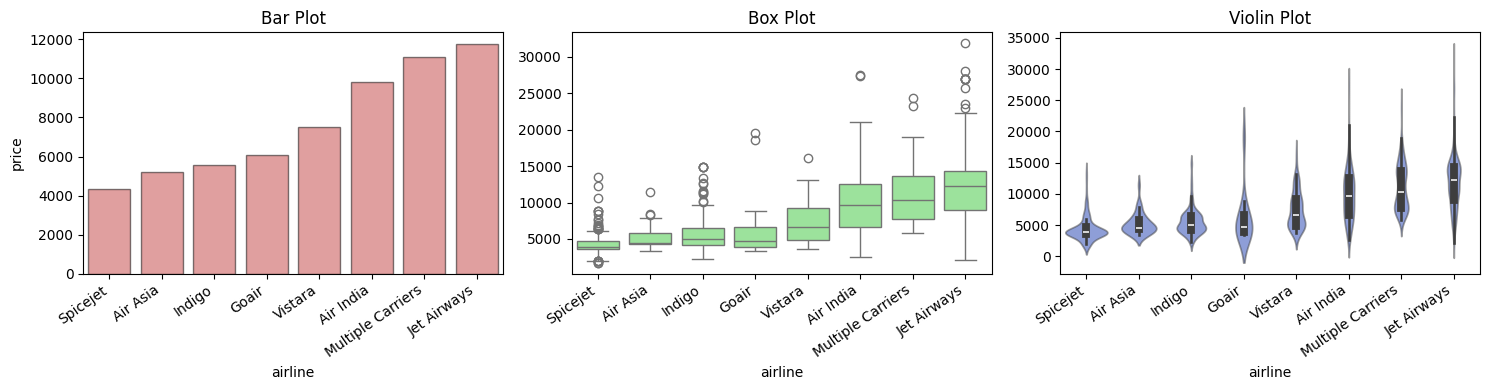

In [34]:
eda_helper_functions.num_cat_bivar_plots(data=train,
	num_var="price",
	cat_var="airline")

### Observation:
- for different flights avg price is different
- highest avg price - jet airways
- i.e. 'airline' is good feature to predict the price so for
- in box plot we can see distribution of price for each airline
- dimond symbol indicates potential outliers

#### Step 4:

In [35]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 154.7735692214705
- p-value              : 1.9811680025243705e-174
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 761.4128258041725
- p-value              : 3.92697989518616e-160
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


#### Step 5:

### Multivariate analysis among "destination","price" and "airline".

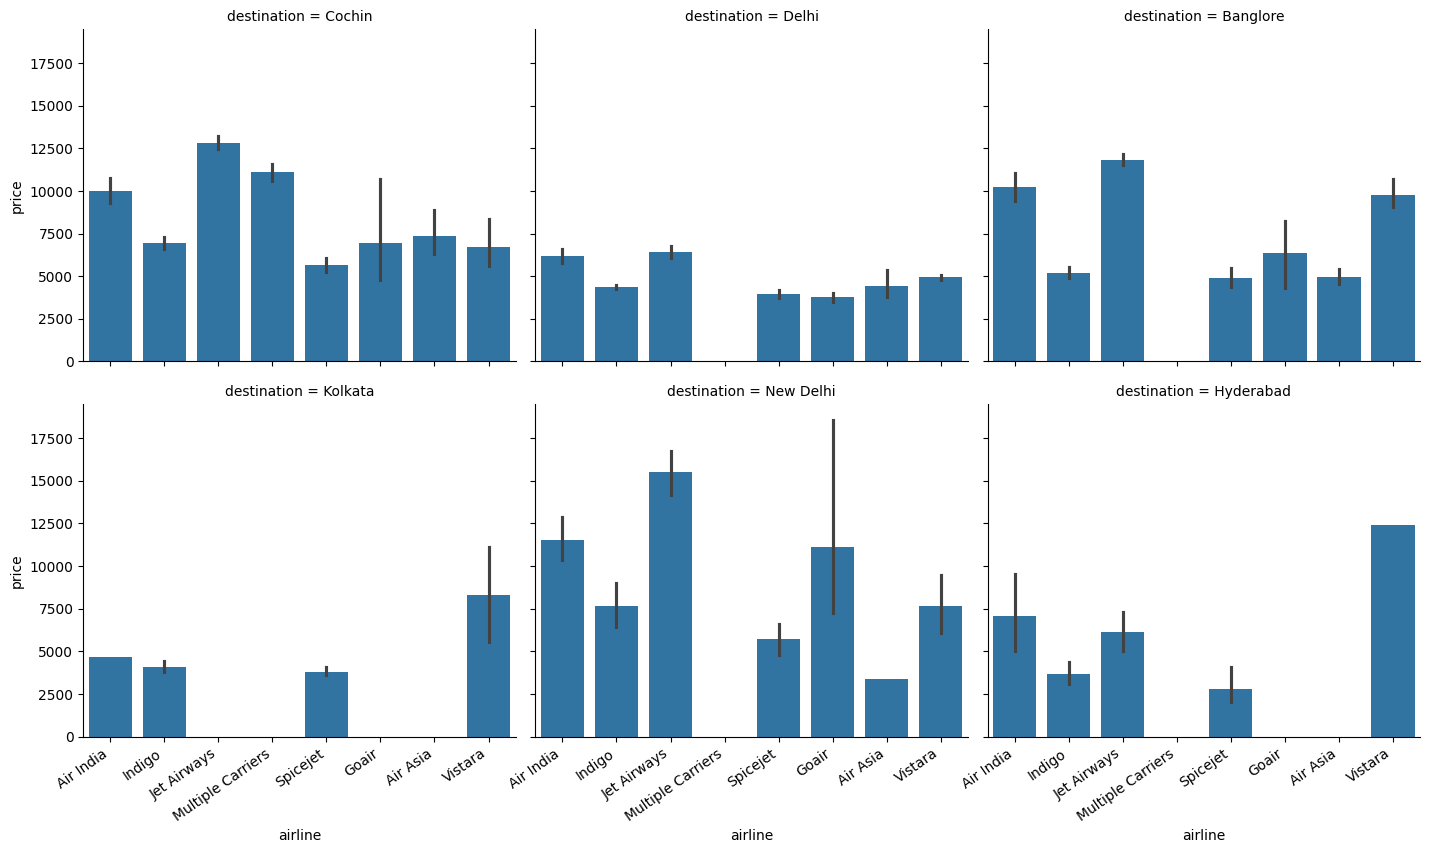

In [36]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

#### Observation:
- there are 6 destinations
- cochin is the only destnation for all airlines

### Multivariate analysis among "source","price" and "airline".

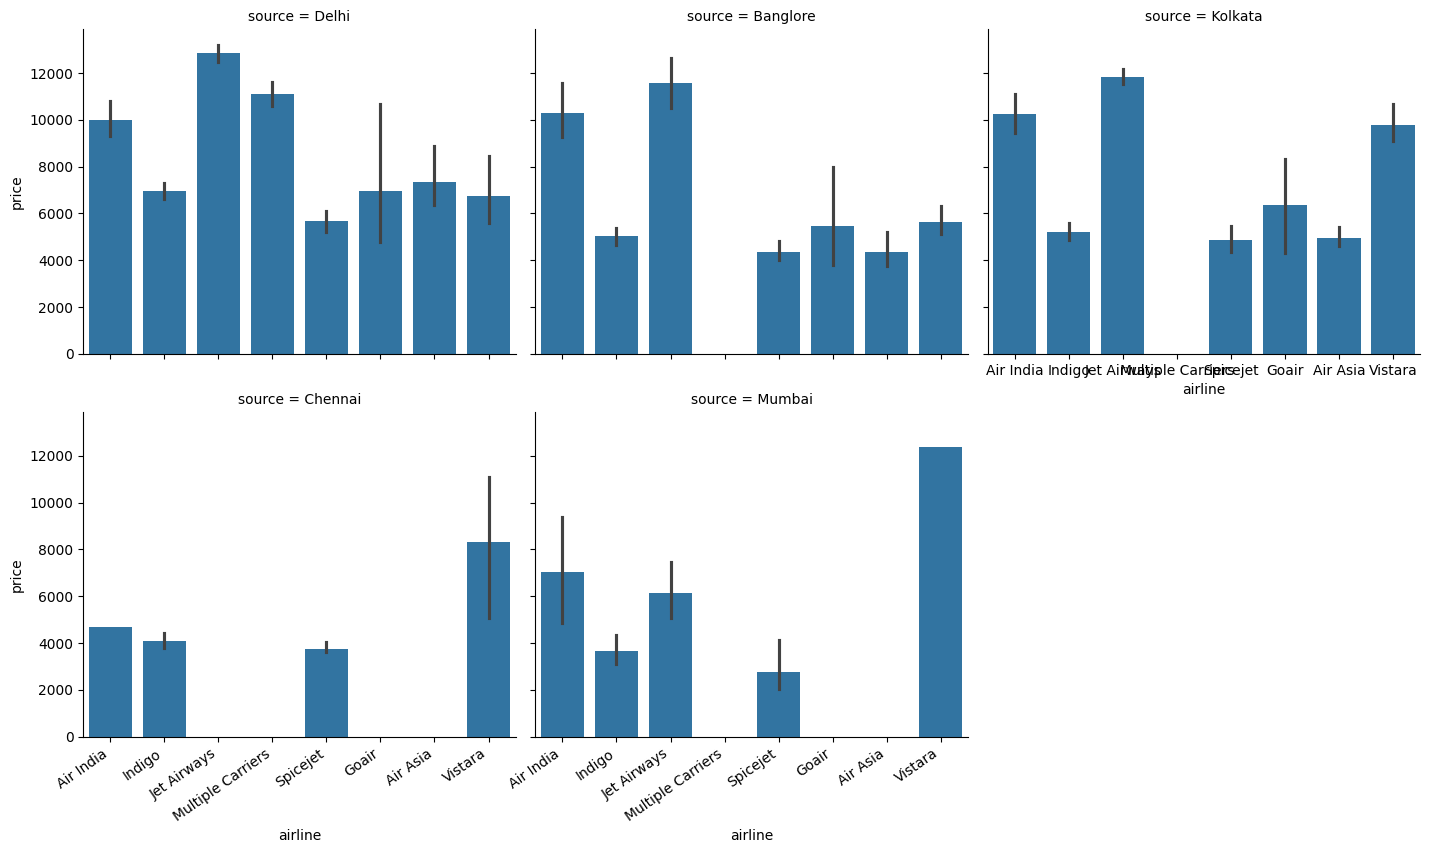

In [38]:
airline_grid = sns.FacetGrid(
	data=train,
	col="source",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

#### Observation:
- there are 5 sources
- Chennai is the only source for all airlines

### 8.2 date_of_journey

In [40]:
train.date_of_journey

0      2019-05-21
1      2019-03-27
2      2019-05-12
3      2019-06-06
4      2019-05-15
          ...    
1595   2019-05-03
1596   2019-05-06
1597   2019-03-03
1598   2019-03-21
1599   2019-03-15
Name: date_of_journey, Length: 1600, dtype: datetime64[ns]

### Univatiate Analysis:

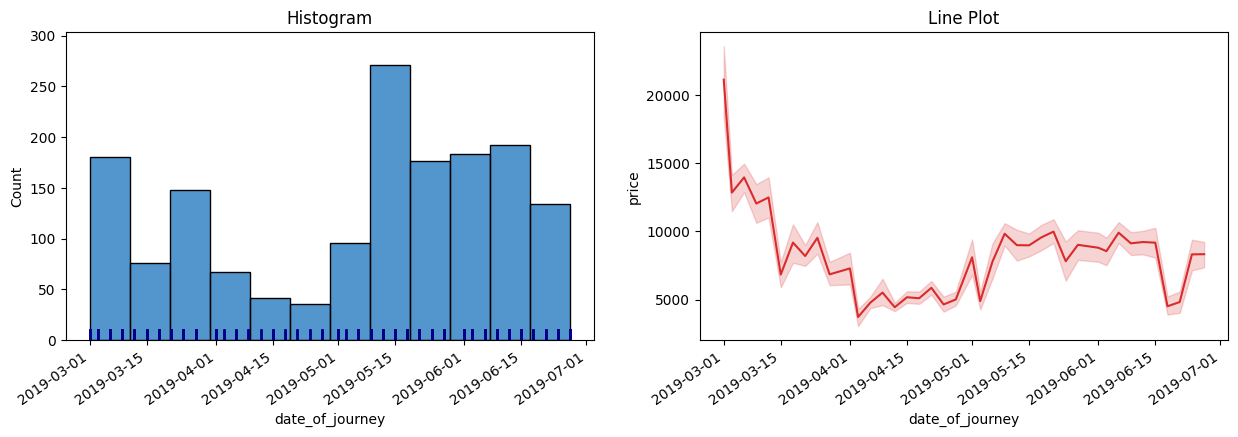

In [41]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

### Observation:
- In first half of march we have more flights than in scond half
- In first half of april we also have more flights than in second half
- In april very less flights
- In May we hightest no of travellers
- May and June are Peak months for airlines
- In line graph which is between "price" and "Date_of_journey" from march to april avg price is decressing and continue to decress till May.

### Bivariate Analysis:

#### Average Price per month:

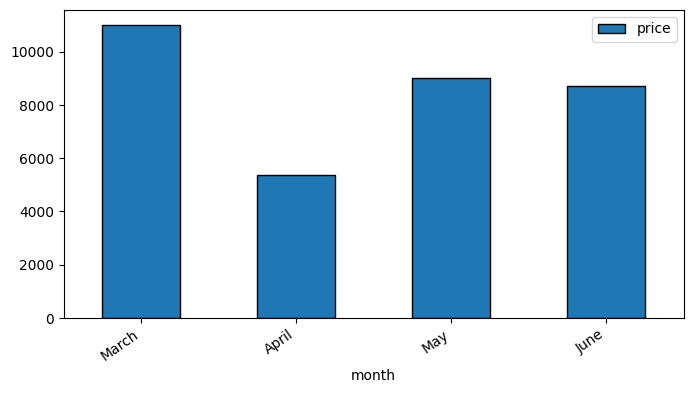

In [42]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

#### Average Price per week:

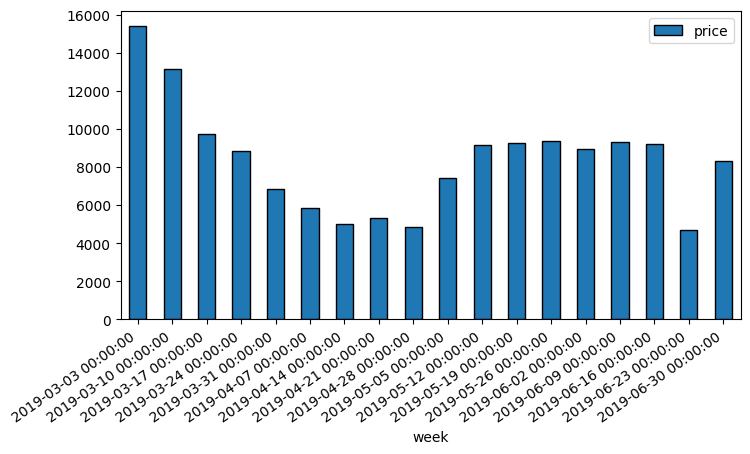

In [51]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
#     # .set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

### Multivariate Analysis:

### Multivariate Analysis of date_of_journey, source, price:

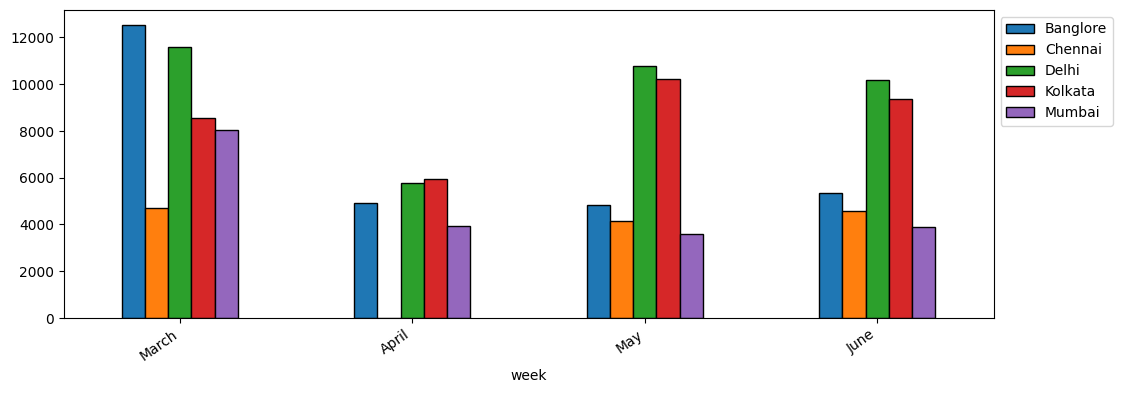

In [67]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])  # applying Grouper on more than 1 cols
	.price.mean()
    .unstack(fill_value = 0)
    .set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)
ax = plt.gca()
ax.legend(
    loc = "upper left",
    bbox_to_anchor=(1,1)
)
eda_helper_functions.rotate_xlabels(ax)

### 8.3 dep_time

In [68]:
train.dep_time

0      2024-05-18 14:05:00
1      2024-05-18 10:45:00
2      2024-05-18 19:50:00
3      2024-05-18 20:25:00
4      2024-05-18 11:40:00
               ...        
1595   2024-05-18 06:00:00
1596   2024-05-18 09:35:00
1597   2024-05-18 18:35:00
1598   2024-05-18 10:00:00
1599   2024-05-18 22:45:00
Name: dep_time, Length: 1600, dtype: datetime64[ns]

### Univariate Analysis:

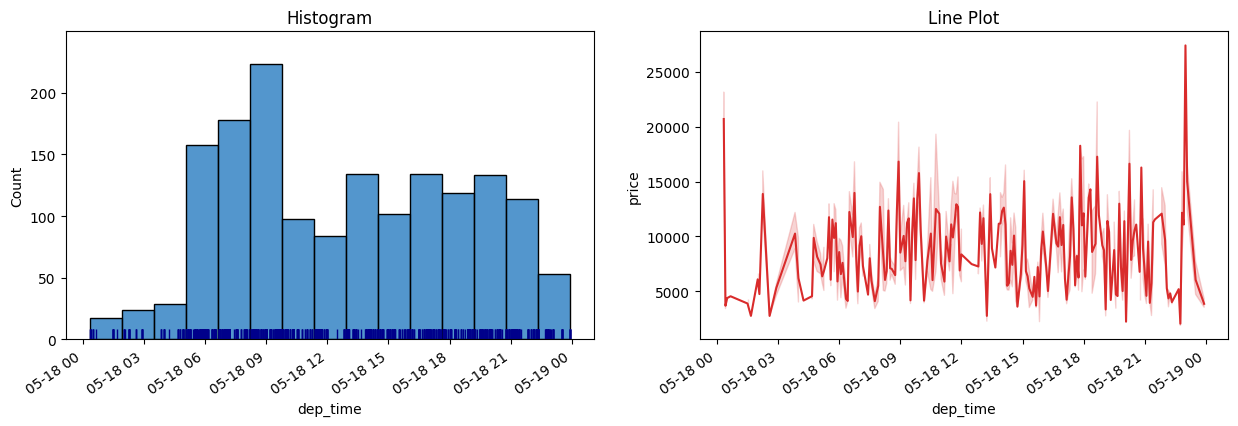

In [69]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

In [72]:
(
	train
	.dep_time
    .dt.hour
    .pipe(lambda ser: pd.Series(np.select([ser.between(4, 12, inclusive="left"),
				   ser.between(12, 16, inclusive="left"),
				   ser.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")))
)

0       afternoon
1         morning
2         evening
3           night
4         morning
          ...    
1595      morning
1596      morning
1597      evening
1598      morning
1599        night
Length: 1600, dtype: object

####  Now to analysis this column:

In [75]:
(
	train
    # updating dep_time col
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
    # for plots
	# .pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-05-21,Delhi,Cochin,afternoon,2024-05-18 17:55:00,230,0.0,No Info,6094
1,Indigo,2019-03-27,Delhi,Cochin,morning,2024-05-18 21:00:00,615,1.0,No Info,6838
2,Jet Airways,2019-05-12,Banglore,Delhi,evening,2024-05-18 22:50:00,180,0.0,No Info,7229
3,Jet Airways,2019-06-06,Kolkata,Banglore,night,2024-05-18 14:25:00,1080,1.0,No Info,12692
4,Multiple Carriers,2019-05-15,Delhi,Cochin,morning,2024-05-18 19:15:00,455,1.0,No Info,9001
...,...,...,...,...,...,...,...,...,...,...
1595,Jet Airways,2019-05-03,Banglore,Delhi,morning,2024-05-18 08:45:00,165,0.0,No Info,7229
1596,Jet Airways,2019-05-06,Kolkata,Banglore,morning,2024-05-18 23:35:00,840,1.0,No Info,12121
1597,Indigo,2019-03-03,Delhi,Cochin,evening,2024-05-18 01:35:00,420,1.0,No Info,14871
1598,Multiple Carriers,2019-03-21,Delhi,Cochin,morning,2024-05-18 19:15:00,555,1.0,In-flight meal not included,8401


#### for plot:

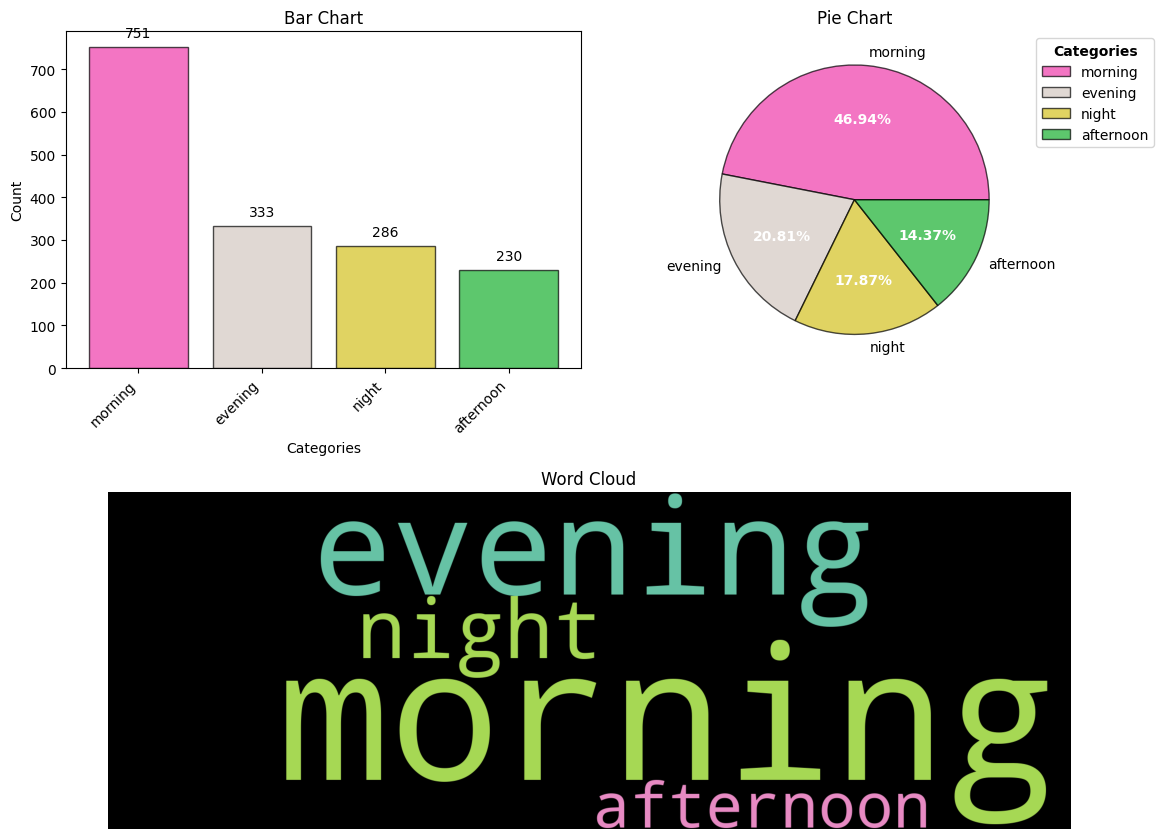

In [78]:
(
	train
    # updating dep_time col
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
    # for plots
	.pipe(eda_helper_functions.cat_univar_plots, "dep_time")
)

### Bivariate Plot:

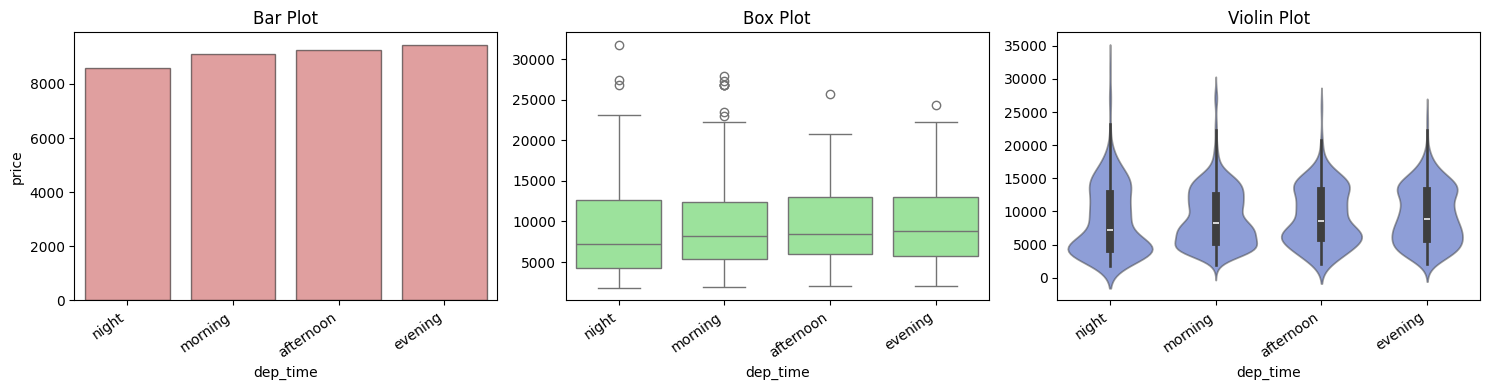

In [80]:
(
	train
    # updating dep_time col
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
    # for plots
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

### 8.4 duration

In [81]:
train.duration

0        230
1        615
2        180
3       1080
4        455
        ... 
1595     165
1596     840
1597     420
1598     555
1599      85
Name: duration, Length: 1600, dtype: int64

In [82]:
eda_helper_functions.num_summary(train, "duration")

0        230
1        615
2        180
3       1080
4        455
        ... 
1595     165
1596     840
1597     420
1598     555
1599      85
Name: duration, Length: 1600, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 1,600 / 1,600 rows


,value
percentile,
0,75.00
5,90.00
10,144.50
25,173.75
50,505.00
75,920.00
90,1430.00
95,1590.00
99,1820.10


,value
mean,629.356250
trimmed mean (5%),596.704861
trimmed mean (10%),569.171875
median,505.000000


,value
var,246329.510280
std,496.315938
IQR,746.250000
mad,335.000000
coef_variance,0.788609


,value
skewness,0.859221
kurtosis,-0.206306


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.8761641785443629e-32
Test Statistic       : 0.8887882415773674
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.785
Test Statistic       : 58.62233916656487
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


#### Observation
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- We conclude that the data sample is not normally distributed

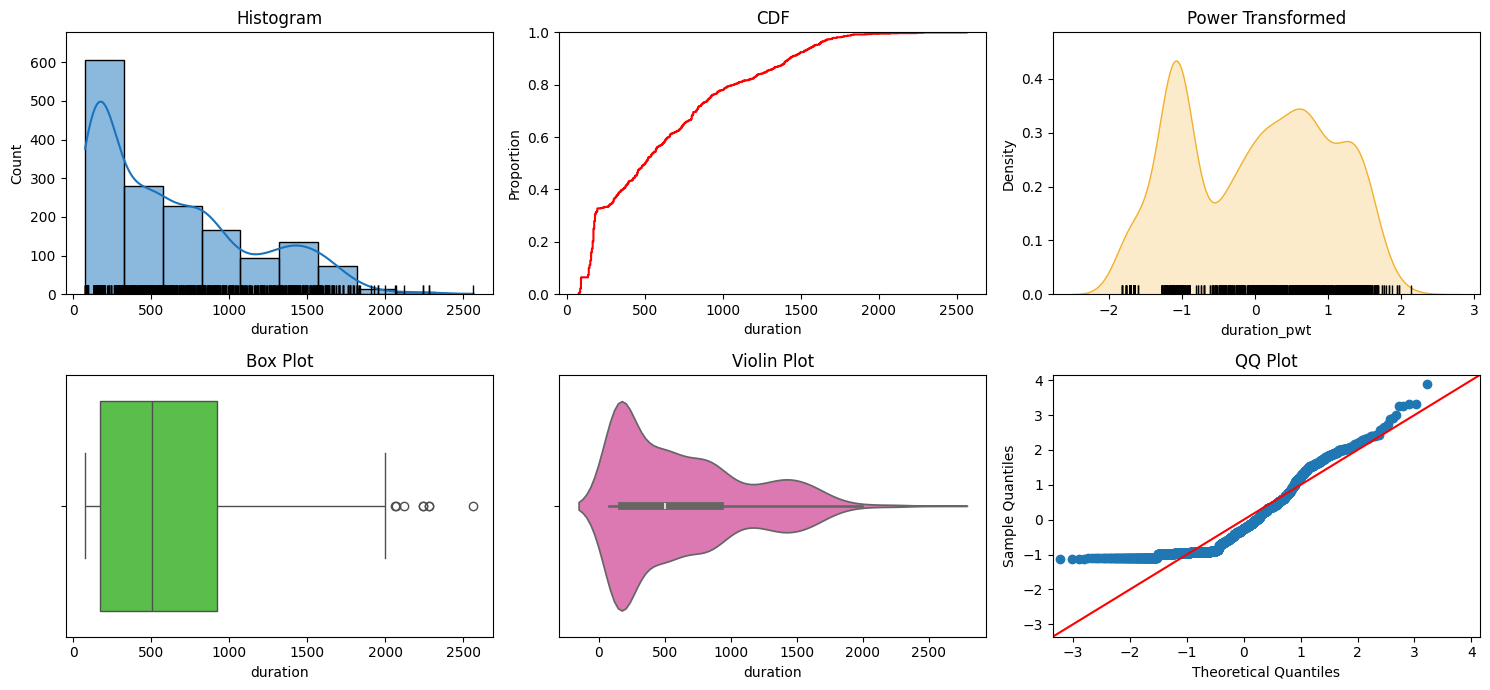

In [84]:
eda_helper_functions.num_univar_plots(train, "duration")

### Bi-variate Analysis between duration and price

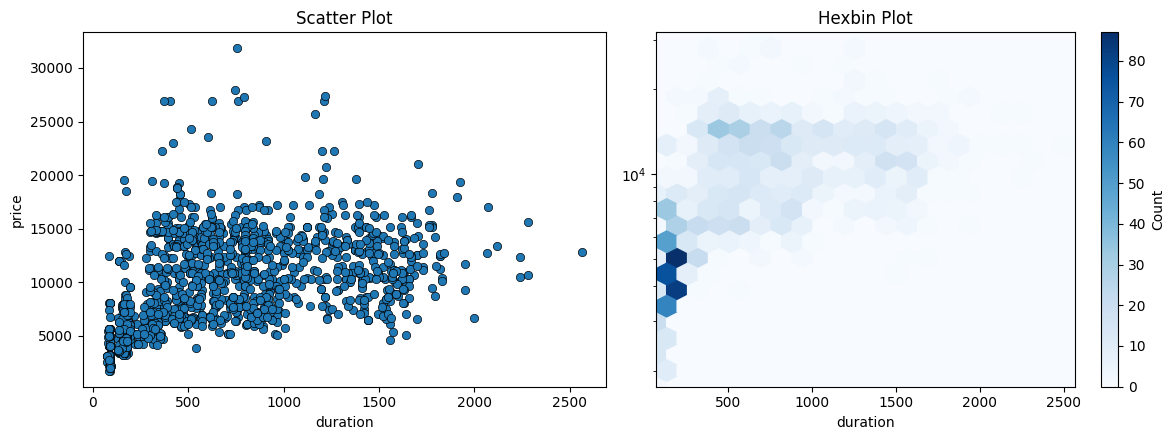

In [85]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

### Observation
- price and duration are linearly relatedas shown by Scatter plot
- most of the flights are of short duration as shwon by Hexbon plot

In [86]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5444580993338008
- p-value              : 3.6286154832504837e-124
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6982307788717
- p-value              : 3.044023746684296e-234
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


### Observation
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- The variables price and duration are correlated

### Multivariate Analysis:

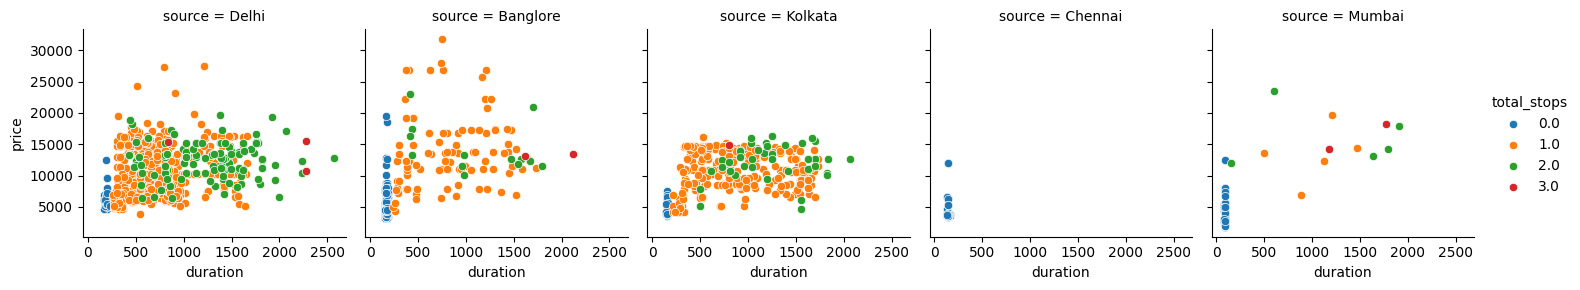

In [90]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
    # row = "additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

### Observation
- If source is chennai there is no stops
- for 3 destinations Delhi has 3 stops
- for 2 destinations Mumbai and Banglore has 3 stops
- for 1 destination Kolkata has 3 stop
- Most of the source has 1 stops
- Source which are of short durations have 0 stop

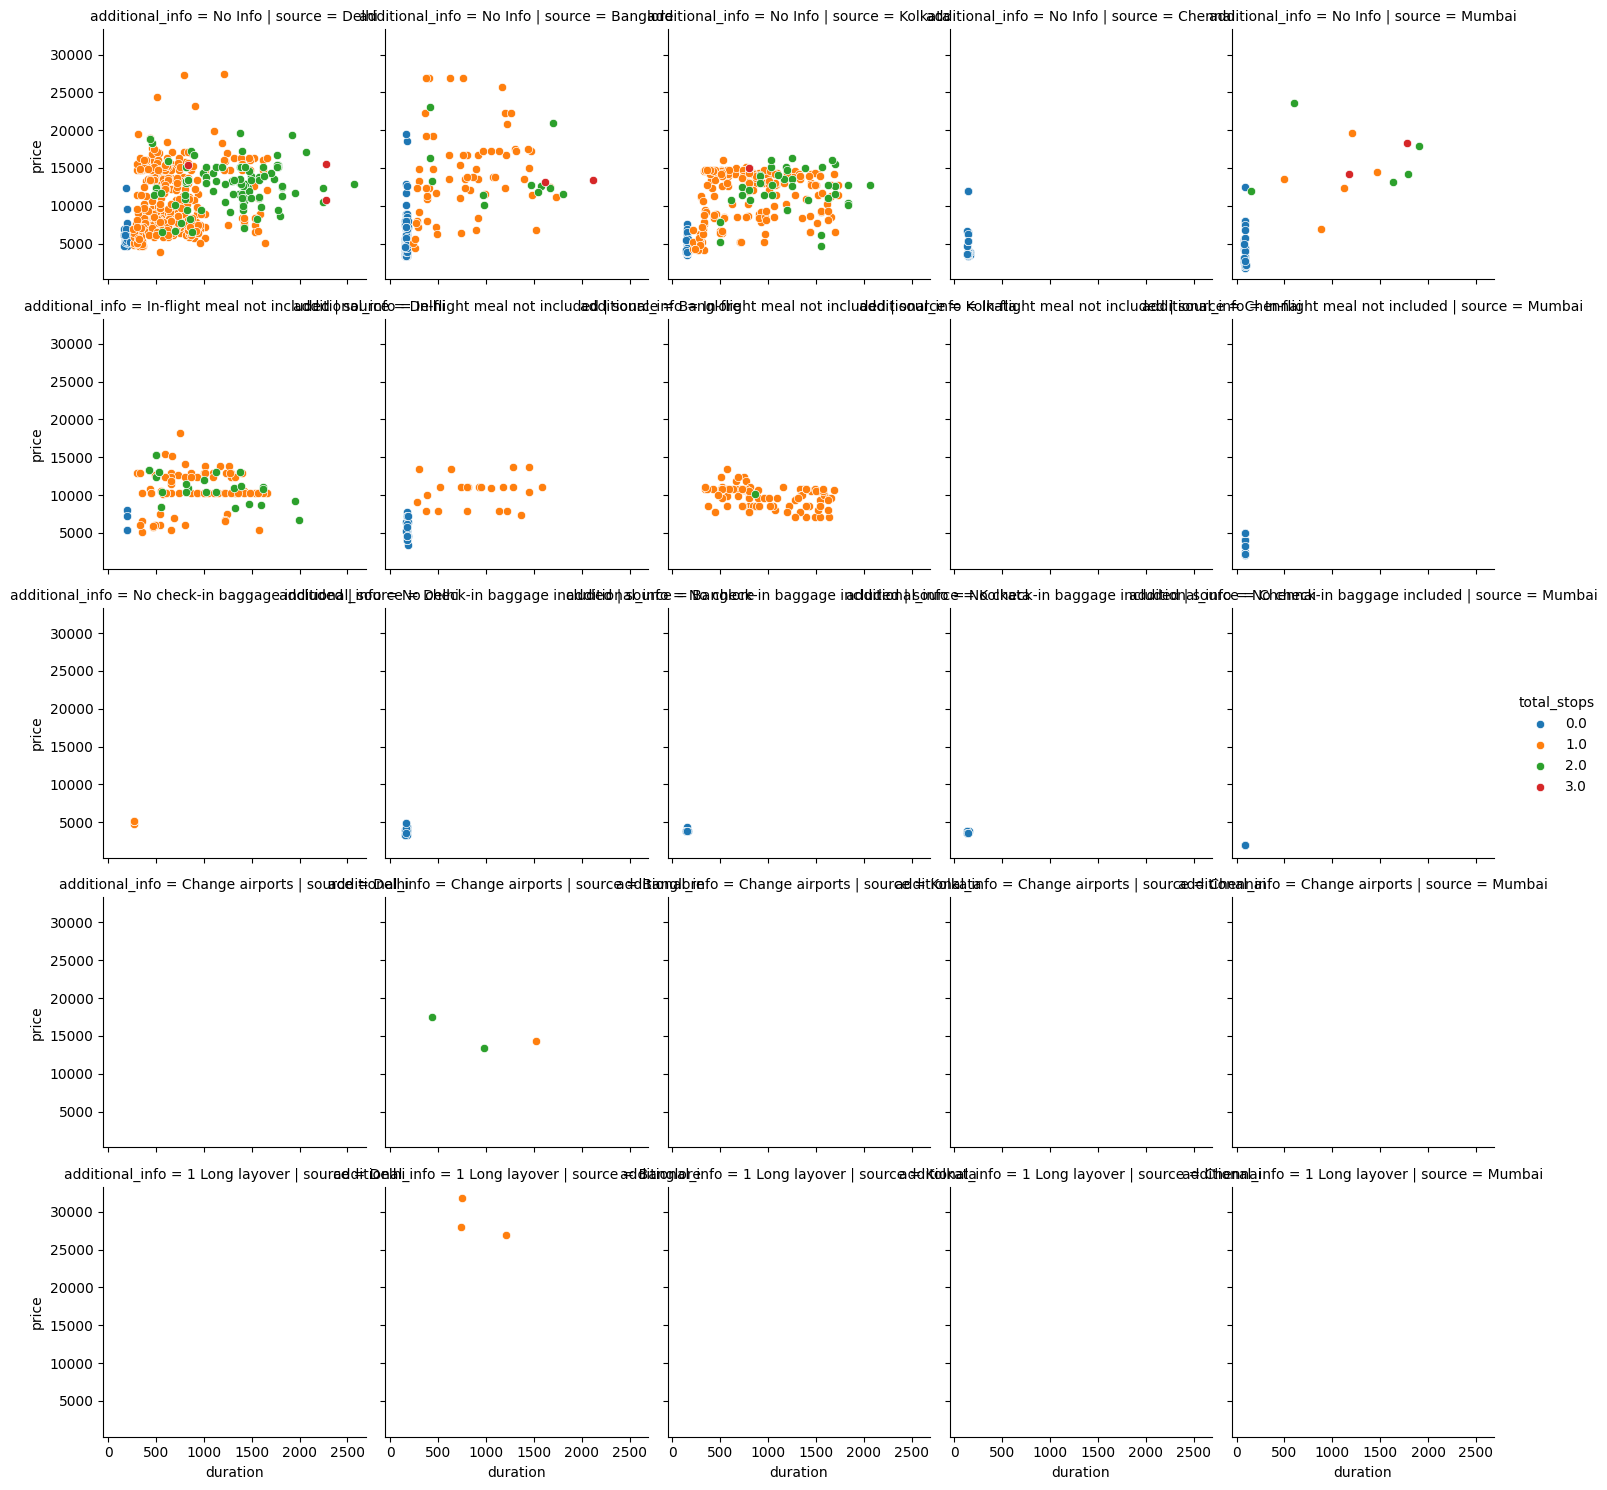

In [101]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [102]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -945.625
Upper Limit : 2039.375


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
1196,Air India,2019-05-15,Kolkata,Banglore,05:50:00,16:15:00,2065,2.0,No Info,12723
1137,Jet Airways,2019-03-06,Delhi,Cochin,17:55:00,04:25:00,2070,2.0,No Info,17072
570,Air India,2019-03-12,Banglore,New Delhi,06:45:00,18:05:00,2120,3.0,No Info,13387
562,Air India,2019-06-09,Delhi,Cochin,05:55:00,19:15:00,2240,2.0,No Info,10493
1275,Jet Airways,2019-03-21,Delhi,Cochin,05:30:00,18:50:00,2240,2.0,No Info,12341
755,Air India,2019-06-15,Delhi,Cochin,05:15:00,19:15:00,2280,3.0,No Info,10703
872,Air India,2019-03-09,Delhi,Cochin,05:15:00,19:15:00,2280,3.0,No Info,15586
293,Jet Airways,2019-03-21,Delhi,Cochin,09:40:00,04:25:00,2565,2.0,No Info,12819


### 8.5 additional_info

In [103]:
eda_helper_functions.cat_summary(train, "additional_info")

0                           No Info
1                           No Info
2                           No Info
3                           No Info
4                           No Info
                   ...             
1595                        No Info
1596                        No Info
1597                        No Info
1598    In-flight meal not included
1599                        No Info
Name: additional_info, Length: 1600, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 1,600 / 1,600 rows


,
count,1600
unique,5
top,No Info
freq,1271


,count,percentage
category,,
No Info,1271,0.794375
In-flight meal not included,279,0.174375
No check-in baggage included,44,0.027500
Change airports,3,0.001875
1 Long layover,3,0.001875


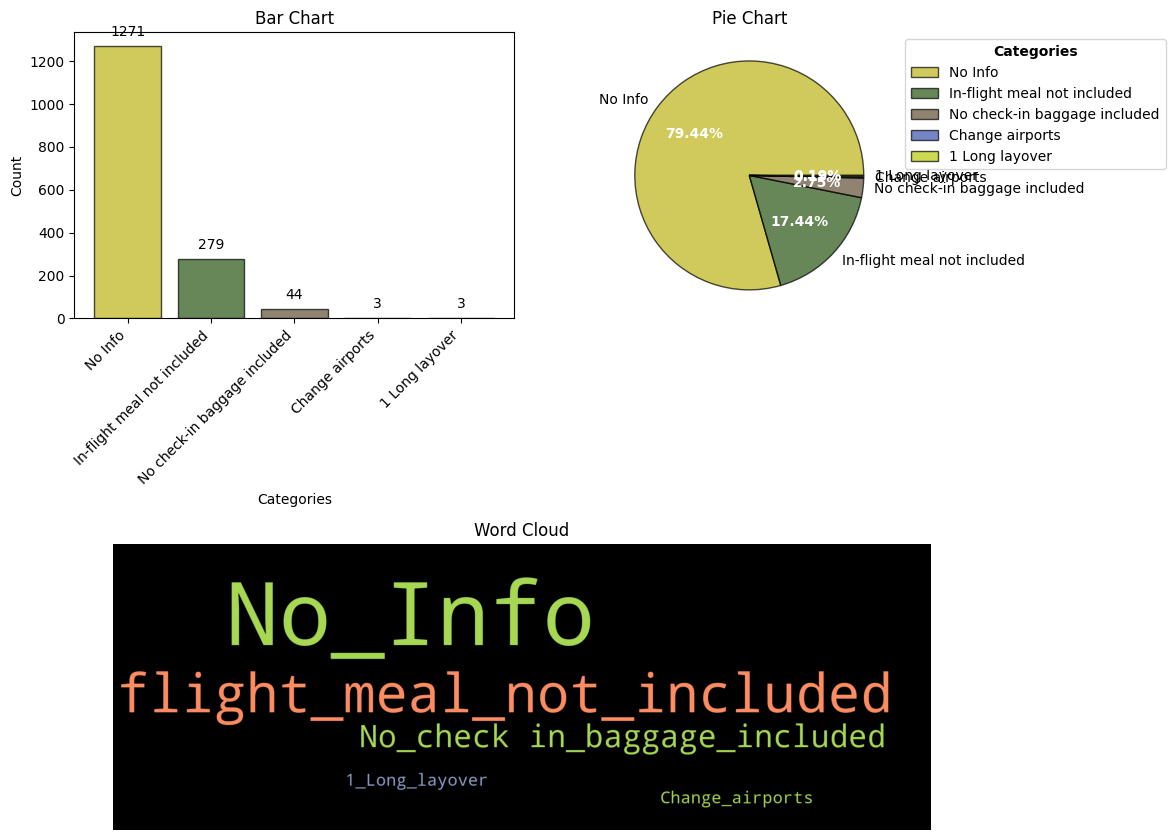

In [104]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

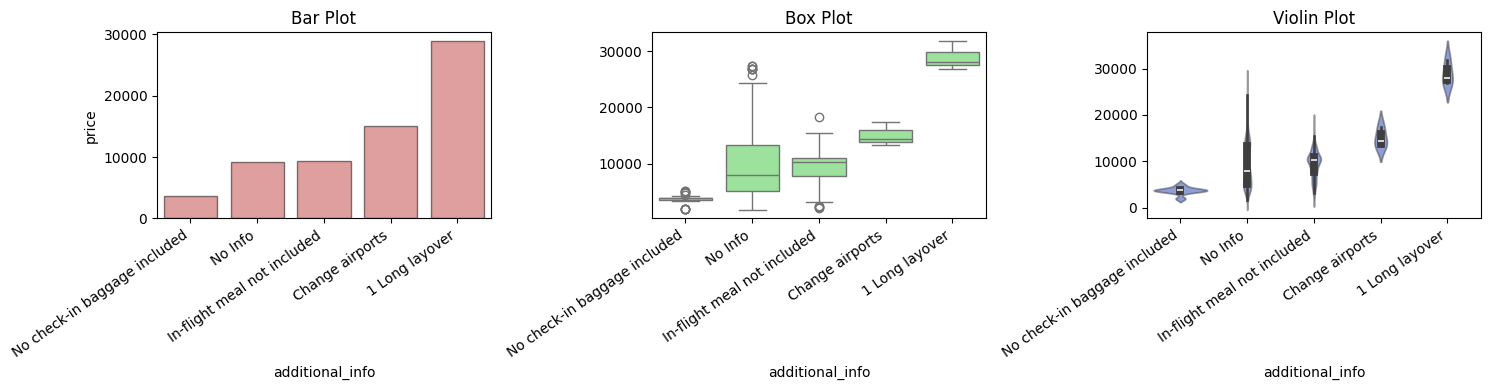

In [105]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

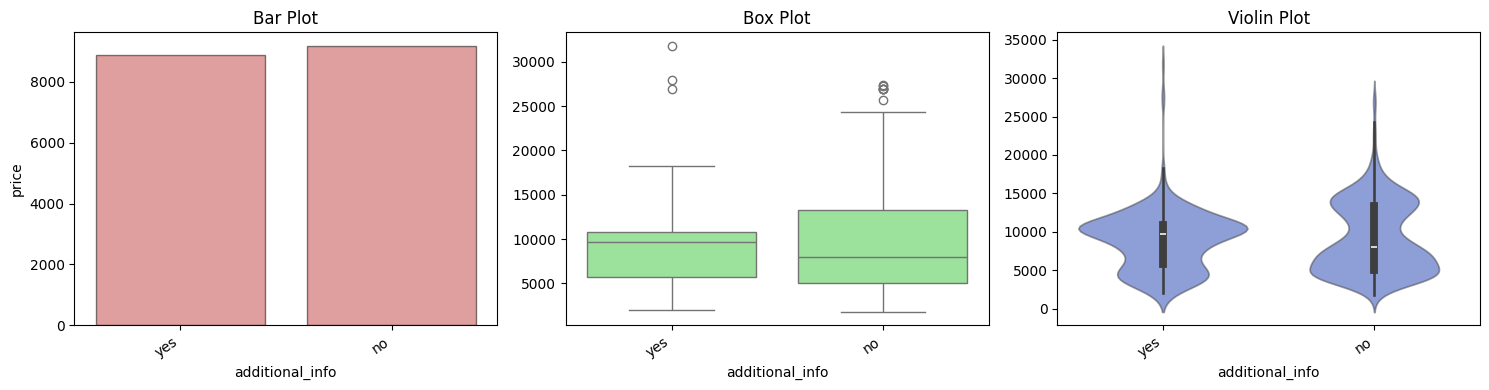

In [106]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

### Observation
- "additional_info" has severely rare categories
- Converted it into a binary feature for further analysis

## 9. Automated EDA

In [109]:
from ydata_profiling import ProfileReport

In [110]:
report = ProfileReport(train)

In [111]:
report.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]